# AAI-510 M3 Lab Walkthrough - Unsupervised Learning

In this lab walkthrough we will explore a few unsupervised learning algorithms such as, Principle Compoenent Analysis, K-Means, and Hierarchical Clustering.

In [ ]:
#@title Loading the required libraries

import numpy as np # Pandas for array manipulation
import pandas as pd # Pandas for data manipulation
import seaborn as sns # Seaborn for visualizing. Note: we will also use one of the data sets
import matplotlib.pyplot as plt # Matplotlib for subplots
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Import for feature standardization
from sklearn.decomposition import PCA # Import for PCA generation
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers

### Data Processing

In [ ]:
#@title Mounting your Google Drive to Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Loading data and viewing it

#df = sns.load_dataset('iris')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
shap = df.shape
print("Shape of the dataframe (row, col):",shap,"\r\n")

# Show dataframe
df

Shape of the dataframe (row, col): (768, 9) 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#@title Designating target and features

y = df.Outcome # Target variable
X = df.drop(columns=['Outcome']) # Features by dropping the target column

In [ ]:
#@title Standardizing the data

# Standardizing is needed as most clustering techniques depend on distance measures and hence differently scaled features can skew their importance
sc = StandardScaler() # Create scaler object
std_X = sc.fit_transform(X) # Apply to data. Note: an array is returned
X = pd.DataFrame(data=std_X, columns=X.columns) # Convert array back to DataFrame

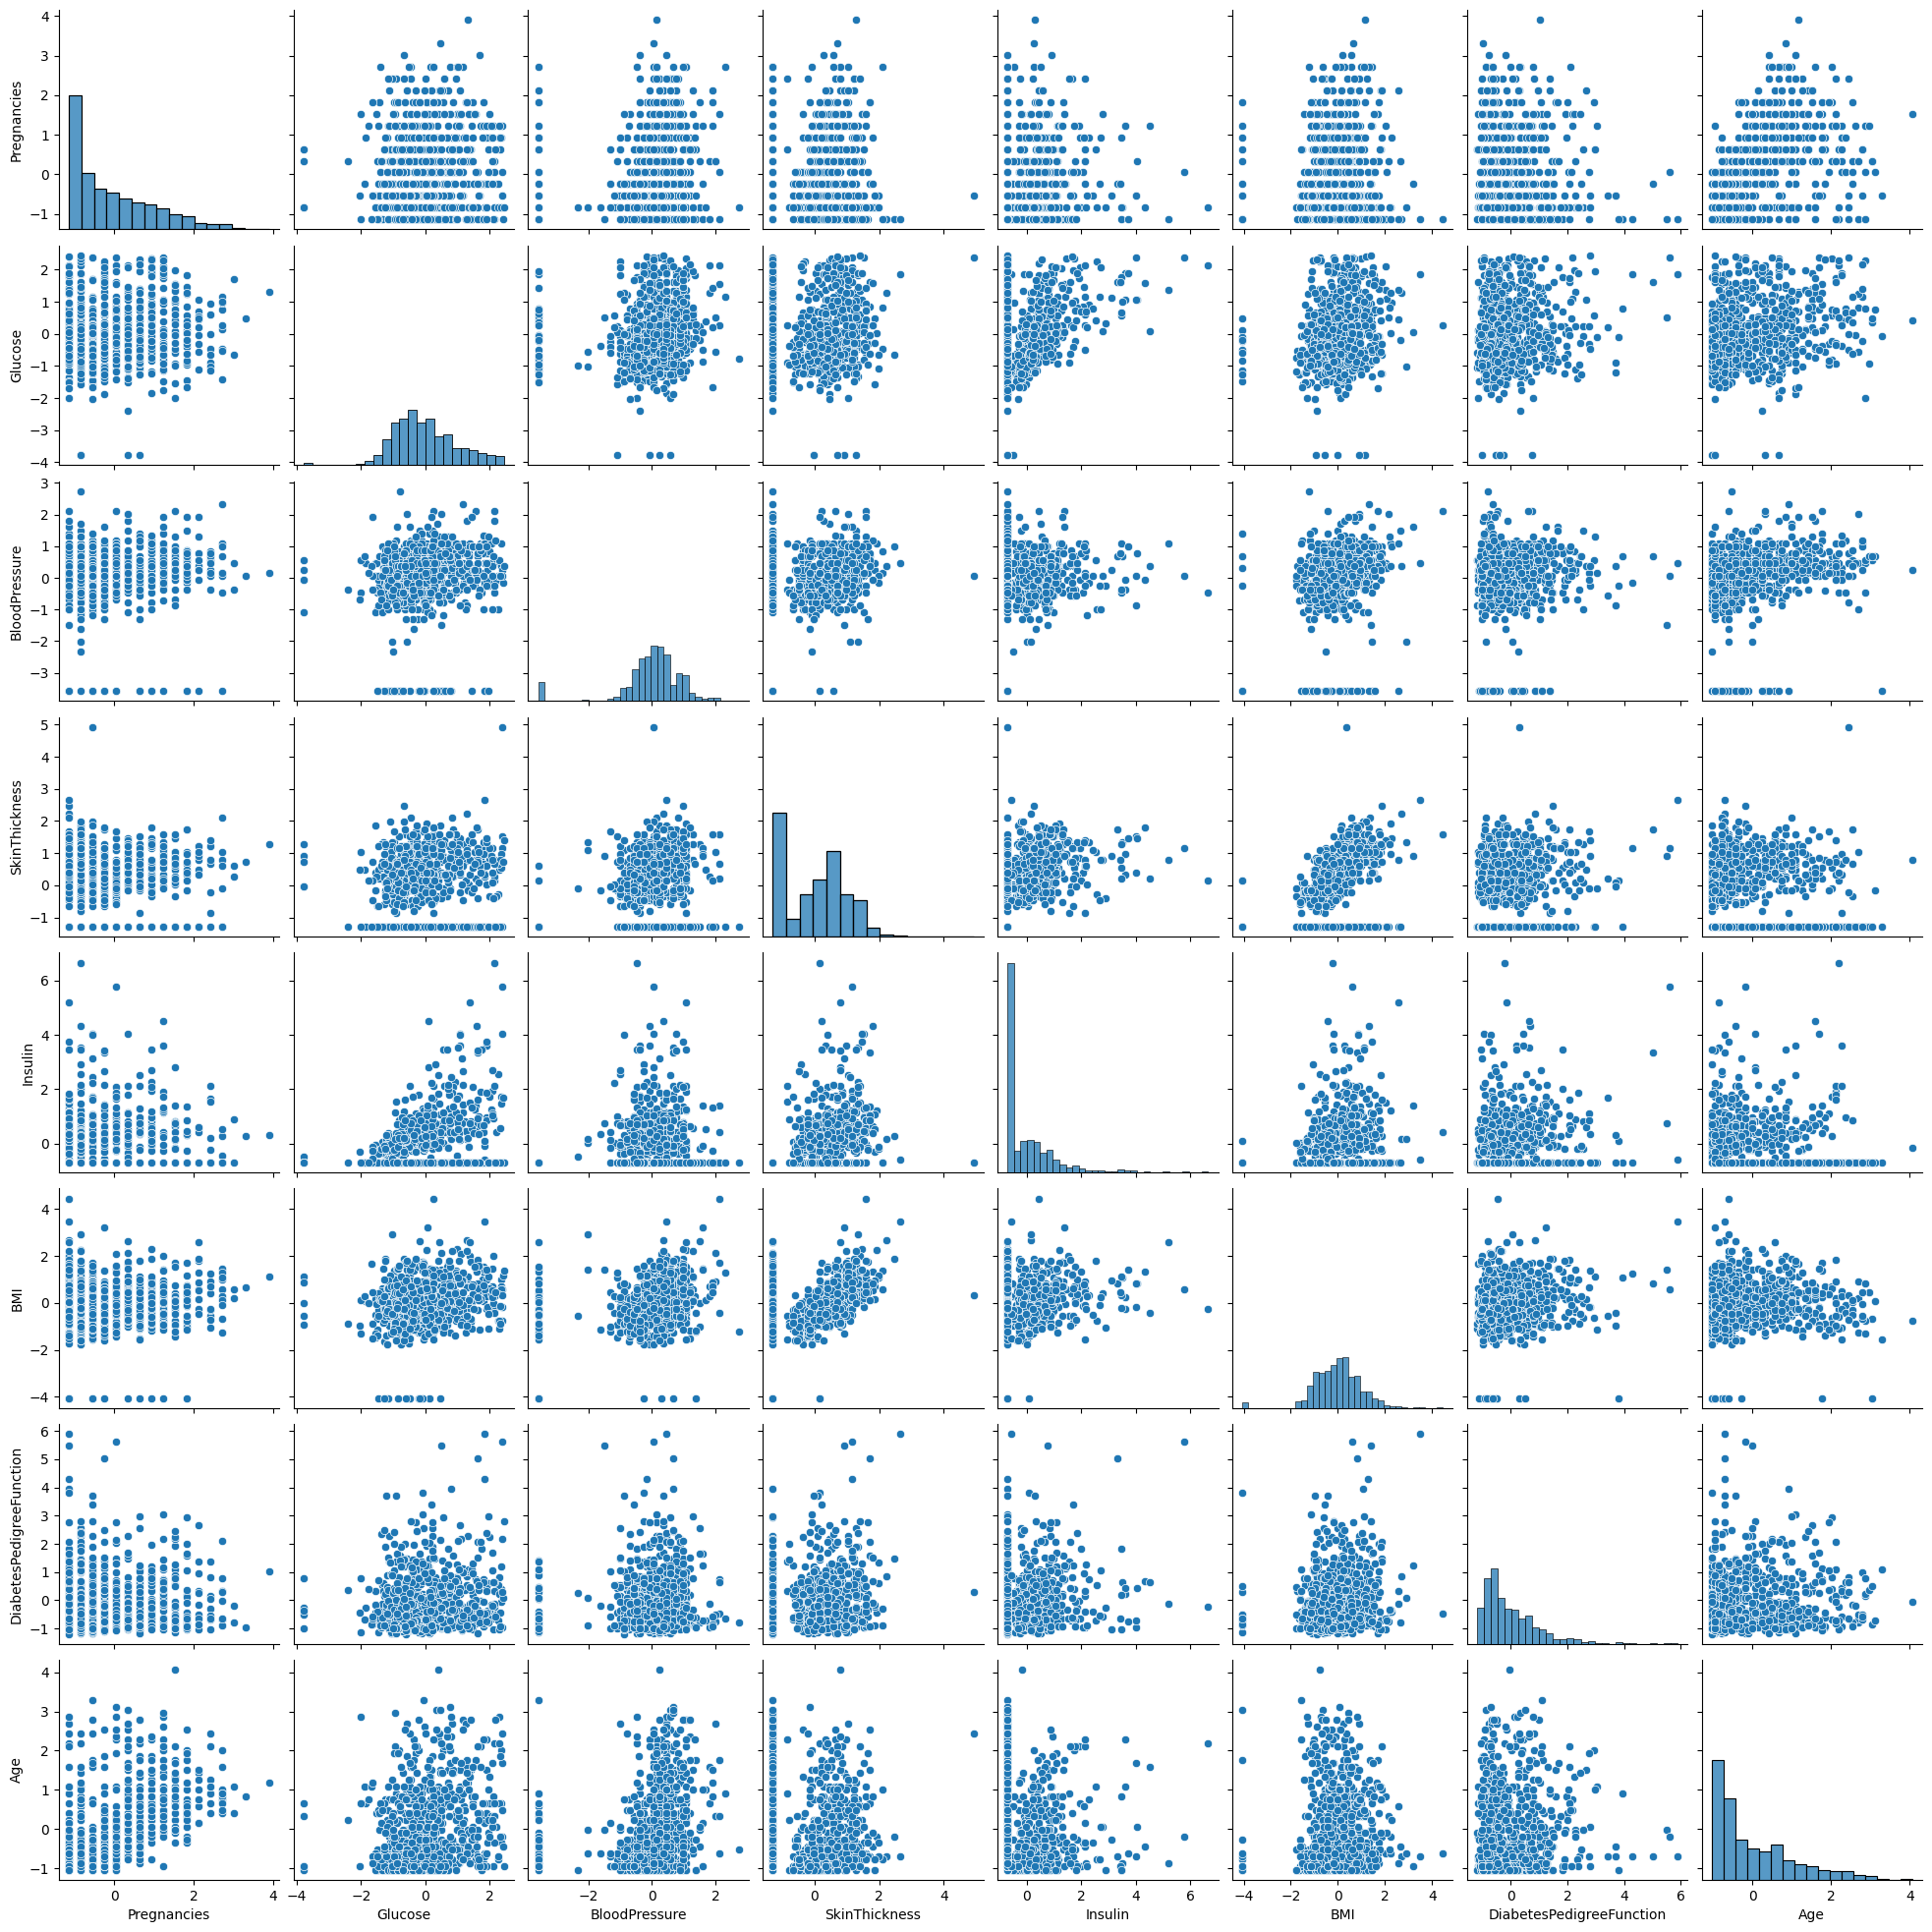

In [ ]:
#@title Plotting the Data

sns.pairplot(X) # Plot each variable against all other variables
plt.show()

## Principal Component Analysis

In [ ]:
#@title Generating Principal Components

pca = PCA() # Create PCA object
pca_db_comp = pca.fit_transform(X) # Generate the Principle Components of data

In [ ]:
# Building a dataframe from the Principal Components array

pca_db_cols = [] # Initialize an empty array to hold the column names
for i in range(0, len(pca_db_comp[0])): # Iterate through the number of columns in the array
  pca_db_cols.append("PC"+str(i)) # Build and append column names
pca_db_df = pd.DataFrame(data=pca_db_comp, columns=pca_db_cols)
pca_db_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352
...,...,...,...,...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926,-2.541527,-0.077322,1.141357,-0.138590
764,-0.100405,-0.614181,-0.764353,-0.134859,0.499290,0.529339,0.152109,0.467532
765,-0.283475,0.097065,-0.077192,-0.687561,-0.523009,-0.538270,-0.335563,0.289439
766,-1.060324,0.837062,0.425030,-0.204493,0.957593,0.153307,1.180308,-0.534344


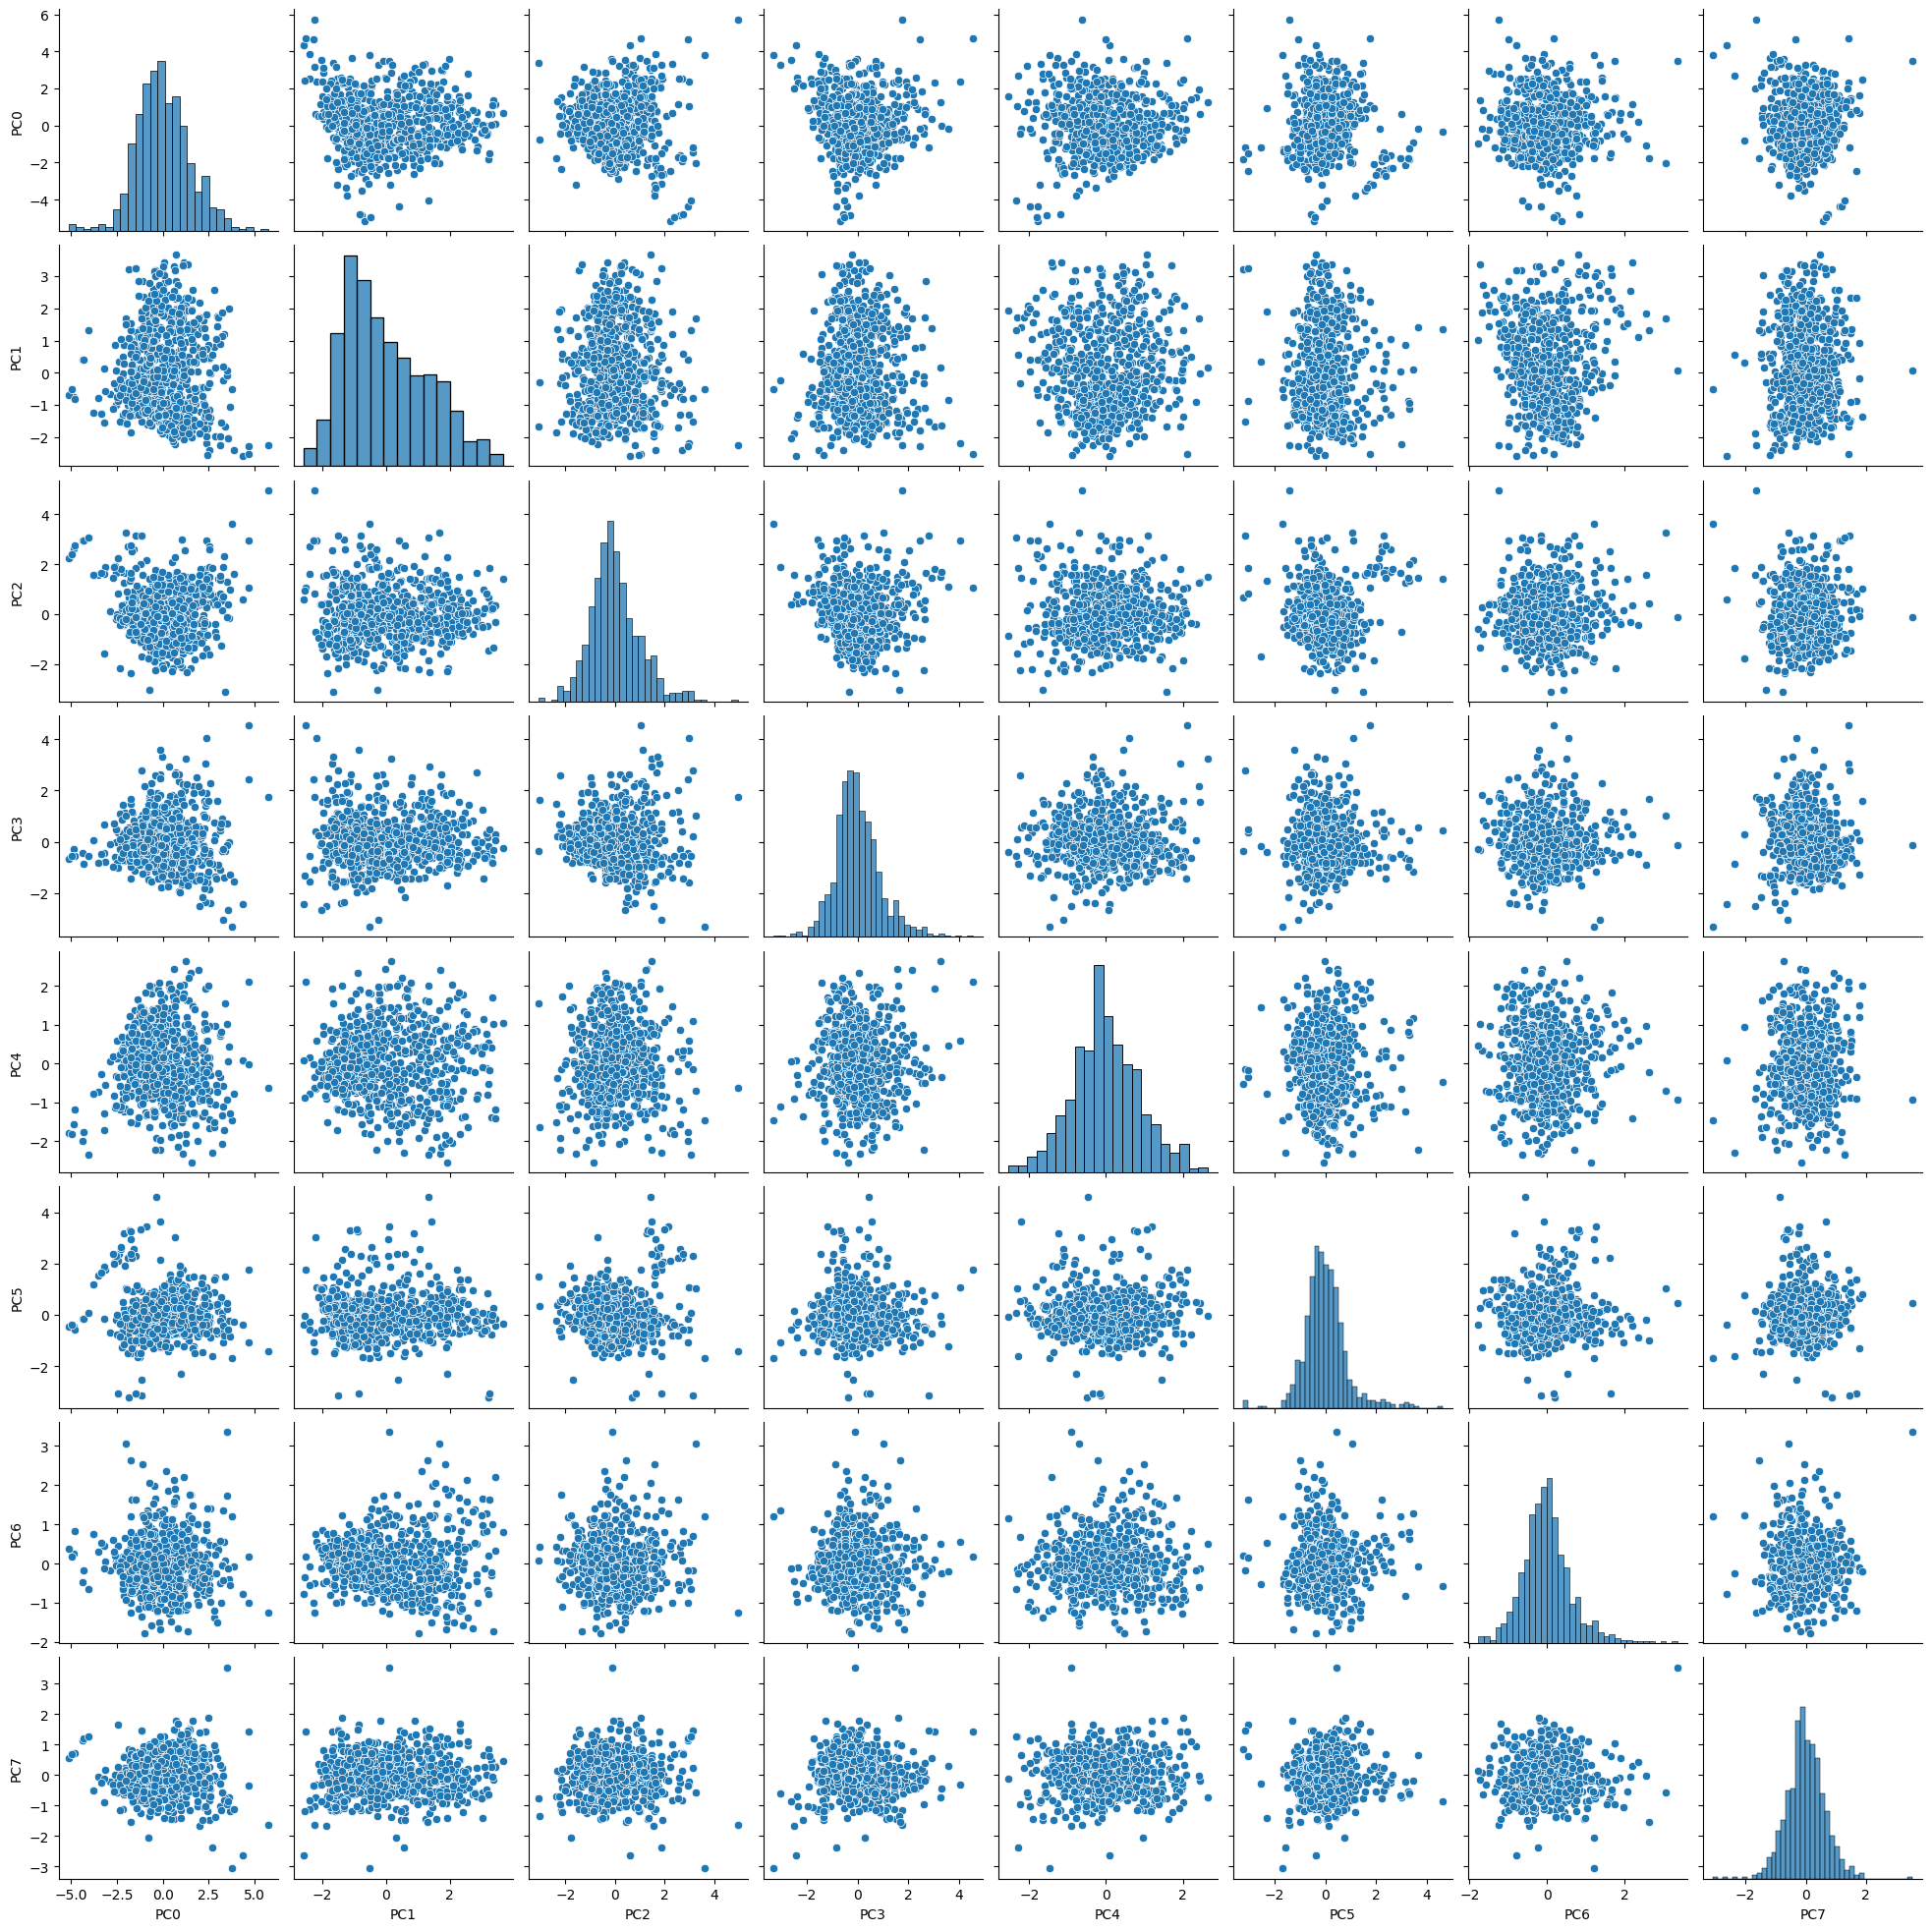

In [ ]:
#@title Ploting the Principal Components

sns.pairplot(pca_db_df)

Variance Explained by each component:
 [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


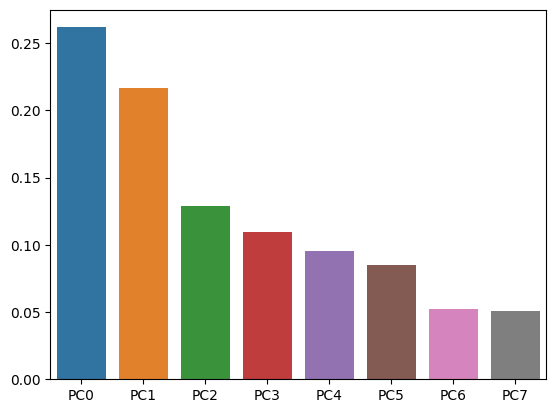

In [ ]:
#@title Analyzing the variance of PCs

var_ratios = pca.explained_variance_ratio_ # Fetch variance ratios
print("Variance Explained by each component:\r\n", var_ratios) # Print variance ratios
sns.barplot(x=pca_db_cols, y=var_ratios) # Chart variance ratios
plt.show()

## K-Means Clustering

In [ ]:
#@title Applying K-Means
kmn = KMeans(n_clusters = 20, n_init='auto', random_state = 0) # Create KMeans object
kmn.fit(X) # Apply to the data
kmn_lbl = kmn.labels_ # Capture K-Means labels

#Append labels to the DataFrames
#X['KMeansLabel'] = kmn_lbl.tolist() # Original Features
#pca_db_df['KMeansLabel'] = kmn_lbl.tolist() # Principal Componenets
#df['KMeansLabel'] = kmn_lbl.tolist() # Original DataFrame with class labels, Outcome
pca_db_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,KMeansLabel
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304,5
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215,8
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528,11
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648,4
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352,12
...,...,...,...,...,...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926,-2.541527,-0.077322,1.141357,-0.138590,14
764,-0.100405,-0.614181,-0.764353,-0.134859,0.499290,0.529339,0.152109,0.467532,1
765,-0.283475,0.097065,-0.077192,-0.687561,-0.523009,-0.538270,-0.335563,0.289439,6
766,-1.060324,0.837062,0.425030,-0.204493,0.957593,0.153307,1.180308,-0.534344,18


In [ ]:
#@title Visualizing K-Means on Raw Data
sns.pairplot(X, hue='KMeansLabel')


In [ ]:
#@title Visualizing K-Means with PCA
sns.pairplot(pca_db_df, hue='KMeansLabel')


In [ ]:
#@title Visualizing K-Means with Labeled Data

sns.pairplot(df, hue='KMeansLabel')


In [ ]:
#@ Compare clusters with class-labels

#cm = metrics.confusion_matrix(df['Outcome'], df['KMeansLabel']) # Create the confusion matrix
#metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot(); # Plot the confusion matrix

df_pivot = pd.pivot_table(df, values='Age', index='Outcome', columns='KMeansLabel', aggfunc='count')
df_pivot

KMeansLabel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Outcome,,,,,,,,,,,,,,,,,,,,
0,1,64,50,8,91,1,37,2,59,34,6,7,7,12,38,16,10,6,23,28
1,1,15,19,23,3,26,24,10,7,10,23,16,13,5,20,19,9,1,16,8


## Hierarchical Clustering

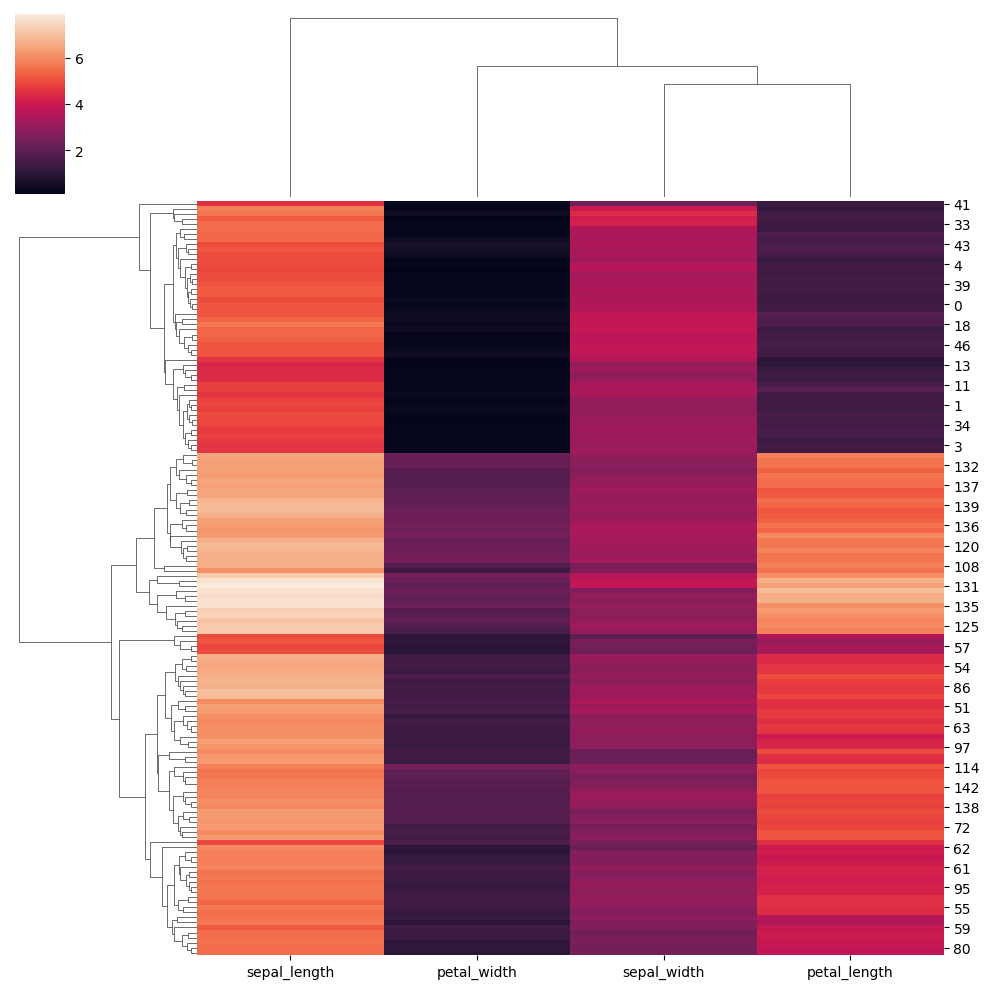

In [ ]:
#@title Plot Clustermap
iris = sns.load_dataset("iris")
species = iris.pop("species")
sns.clustermap(iris)

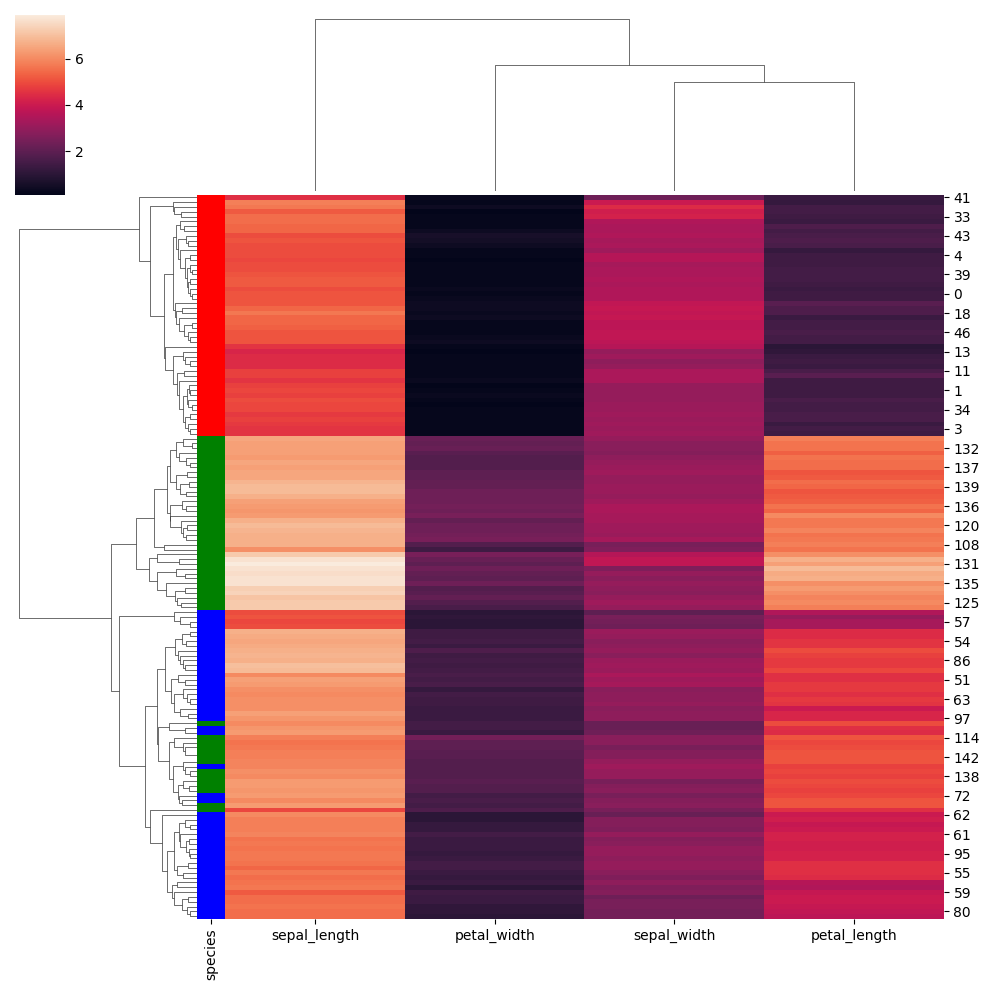

In [ ]:
#@title Plot Clustermap with Labels
lut = dict(zip(species.unique(), "rbg"))
row_clrs = species.map(lut)
sns.clustermap(iris, row_colors=row_clrs)